# Read in the Data
**Expecting:**

DATA = dspe_wage.csv
The above CSV file is a dataset of 3,000 observations describing men’s incomes in Atlanta. It contains the following 11 variables:
year: Year that wage information was recorded

age: Age of worker

maritl: A factor with levels 1. Never Married 2. Married 3. Widowed 4. Divorced and 5. Separated indicating marital status

race: A factor with levels 1. White 2. Black 3. Asian and 4. Other indicating race

education: A factor with levels 1. < HS Grad 2. HS Grad 3. Some College 4. College Grad and 5. Advanced Degree indicating education level

region: Region of the country (mid-atlantic only)

jobclass: A factor with levels 1. Industrial and 2. Information indicating type of job

health: A factor with levels 1. <=Good and 2. >=Very Good indicating health level of worker

health_ins: A factor with levels 1. Yes and 2. No indicating whether worker has health insurance

logwage: Log of workers wage

wage: Workers raw wage


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wages_df = pd.read_csv('data/dspe_wage.csv')

In [7]:
wages_df.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


## High level summary

In [5]:
wages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 281.3+ KB


In [11]:
wages_df.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


## 😕  What's the deal with the 'Unnamed' Column?
- Could it just be a residual record id?

In [12]:
wages_df.columns

Index(['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

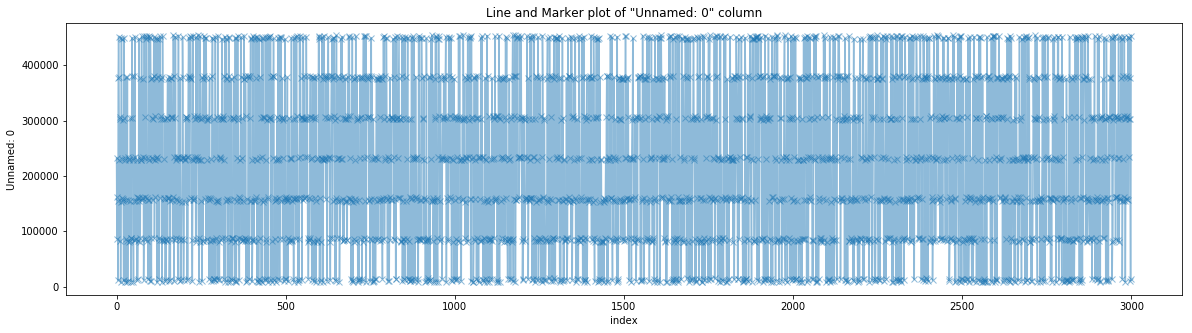

In [92]:
plt.figure(figsize= (20, 5))
wages_df['Unnamed: 0'].plot(marker = 'x', alpha = .5)
plt.title('Line and Marker plot of "Unnamed: 0" column')
plt.xlabel('index')
plt.ylabel('Unnamed: 0')
plt.show()

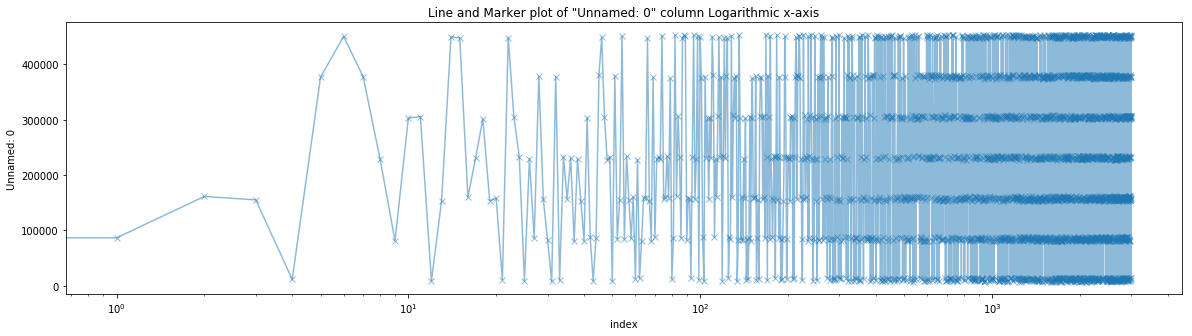

In [94]:
plt.figure(figsize= (20, 5))
wages_df['Unnamed: 0'].plot(marker = 'x', alpha = .5, logx = True)
plt.title('Line and Marker plot of "Unnamed: 0" column Logarithmic x-axis')
plt.xlabel('index')
plt.ylabel('Unnamed: 0')
plt.show()

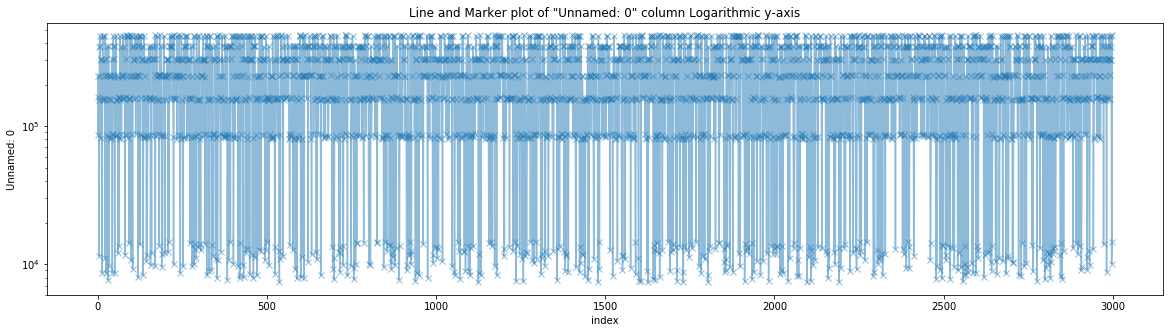

In [95]:
plt.figure(figsize= (20, 5))
wages_df['Unnamed: 0'].plot(logy = True, marker = 'x', alpha = .5)
plt.title('Line and Marker plot of "Unnamed: 0" column Logarithmic y-axis')
plt.xlabel('index')
plt.ylabel('Unnamed: 0')
plt.show()

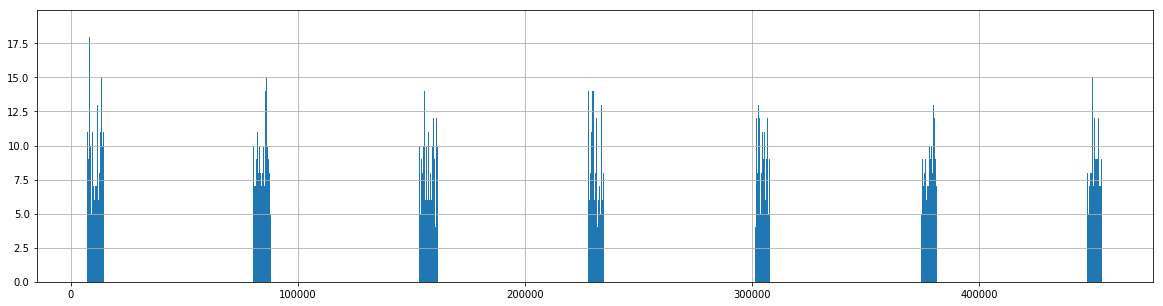

In [75]:
plt.figure(figsize= (20, 5))
wages_df['Unnamed: 0'].hist(bins = 3000)
plt.show()

**That's weird** If the 'Unnamed: 0' column were a unique identifier **and** records increased by one sequentially, then we wouldn't have these clusters in a histogram; and the y axis would never go above 1. 

**Confirm the 'Unnamed: 0' column has 3000 unique values**

In [66]:
wages_df['Unnamed: 0'].unique()

array([231655,  86582, 161300, ...,  10033,  14375, 453557])

In [69]:
len(wages_df['Unnamed: 0'].unique())

3000

✅  **There are in fact 3000 unique values. **

The histogram is dividing the numerical range of the records and dividing it into 3000 bins. If the range were 6000 then each bin would span two values. This explains why there is clustering in the histogram. 

In [74]:
print('max:', max(wages_df['Unnamed: 0']))
print('min:', min(wages_df['Unnamed: 0']))
print('range:', max(wages_df['Unnamed: 0'] - min(wages_df['Unnamed: 0'])))

max: 453870
min: 7373
range: 446497


🤔 **If the 'Unnamed: 0' column is just a unique identifier then why is clustered like this and not in order?**
- Perhaps the csv is a subset of a larger database where the record ids were sequential or had some other logic to it....
    - but if that were the case I would expect a much less structured distribution of id numerical values
        - Well... I guess it's possible that the superset of the records included women, children, or other individuals in other locations even. Such that the record ids of the male workers in atlanta are clustered by year, and the gaps in between are the "data shaped hole" left behind by the filtering statements in the original query. 
        
If, so then I would expect to find some structural relationship between the id numerical values and another variable in the super set, although there is no guarantee that that value is included in the csv I received. 
- **Time is a good suspect**, a paiplot should give us a snapshot answer as to whether there is an easily appreciable relationship between 'Unnamed: 0' and any other of my variables. 

Before we do the pairplot let's see what happens if I sort the data by 'Unnamed: 0'

**Notice 7 clusters and 7 years**
- This is evidence that the csv is a union of slices of a superset containing intermediate records not in our csv.